<a href="https://colab.research.google.com/github/filnels/Homeworks/blob/main/Metrics_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_theme(style='darkgrid', palette='deep')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import r2_score

from sklearn.metrics import (precision_score,
                             recall_score,
                             f1_score,
                             confusion_matrix,
                             classification_report,
                             ConfusionMatrixDisplay)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

# загрузим датасет abalone
abalone = pd.read_csv('abalone.data', header=None)

# посмотрим данные
print(abalone.head())


   0      1      2      3       4       5       6      7   8
0  M  0.455  0.365  0.095  0.5140  0.2245  0.1010  0.150  15
1  M  0.350  0.265  0.090  0.2255  0.0995  0.0485  0.070   7
2  F  0.530  0.420  0.135  0.6770  0.2565  0.1415  0.210   9
3  M  0.440  0.365  0.125  0.5160  0.2155  0.1140  0.155  10
4  I  0.330  0.255  0.080  0.2050  0.0895  0.0395  0.055   7


In [ ]:
# Зададим названия столбцов для удобства
abalone.columns = ['Sex', 'Length', 'Diameter', 'Height','Whole Weight', 'Shucked Weight', 'Viscere Weight', 'Schell Weight', 'Rings' ]

In [ ]:
print(abalone.head())

  Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  Viscere Weight  \
0   M   0.455     0.365   0.095        0.5140          0.2245          0.1010   
1   M   0.350     0.265   0.090        0.2255          0.0995          0.0485   
2   F   0.530     0.420   0.135        0.6770          0.2565          0.1415   
3   M   0.440     0.365   0.125        0.5160          0.2155          0.1140   
4   I   0.330     0.255   0.080        0.2050          0.0895          0.0395   

   Schell Weight  Rings  
0          0.150     15  
1          0.070      7  
2          0.210      9  
3          0.155     10  
4          0.055      7  


In [ ]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscere Weight  4177 non-null   float64
 7   Schell Weight   4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
# Видим, что у нас 4177 строки, пустых данных нет,

In [ ]:
# посмотрим на данные в  файле abalone.names
with open('abalone.names', 'r') as file:
    content = file.read()
print(content)


1. Title of Database: Abalone data

2. Sources:

   (a) Original owners of database:
	Marine Resources Division
	Marine Research Laboratories - Taroona
	Department of Primary Industry and Fisheries, Tasmania
	GPO Box 619F, Hobart, Tasmania 7001, Australia
	(contact: Warwick Nash +61 02 277277, wnash@dpi.tas.gov.au)

   (b) Donor of database:
	Sam Waugh (Sam.Waugh@cs.utas.edu.au)
	Department of Computer Science, University of Tasmania
	GPO Box 252C, Hobart, Tasmania 7001, Australia

   (c) Date received: December 1995


3. Past Usage:

   Sam Waugh (1995) "Extending and benchmarking Cascade-Correlation", PhD
   thesis, Computer Science Department, University of Tasmania.

   -- Test set performance (final 1044 examples, first 3133 used for training):
	24.86% Cascade-Correlation (no hidden nodes)
	26.25% Cascade-Correlation (5 hidden nodes)
	21.5%  C4.5
	 0.0%  Linear Discriminate Analysis
	 3.57% k=5 Nearest Neighbour
      (Problem encoded as a classification task)

   -- Data set samp

In [ ]:
# для удобства работы с данными, изменим признаки первого столбца на числовые, присвоив им значения 1,2,3 соответственно
abalone['Sex'] = abalone['Sex'].replace({'M': 1, 'F': 2, 'I': 3})
print(abalone)


      Sex  Length  Diameter  Height  Whole Weight  Shucked Weight  \
0       1   0.455     0.365   0.095        0.5140          0.2245   
1       1   0.350     0.265   0.090        0.2255          0.0995   
2       2   0.530     0.420   0.135        0.6770          0.2565   
3       1   0.440     0.365   0.125        0.5160          0.2155   
4       3   0.330     0.255   0.080        0.2050          0.0895   
...   ...     ...       ...     ...           ...             ...   
4172    2   0.565     0.450   0.165        0.8870          0.3700   
4173    1   0.590     0.440   0.135        0.9660          0.4390   
4174    1   0.600     0.475   0.205        1.1760          0.5255   
4175    2   0.625     0.485   0.150        1.0945          0.5310   
4176    1   0.710     0.555   0.195        1.9485          0.9455   

      Viscere Weight  Schell Weight  Rings  
0             0.1010         0.1500     15  
1             0.0485         0.0700      7  
2             0.1415         0.2100 

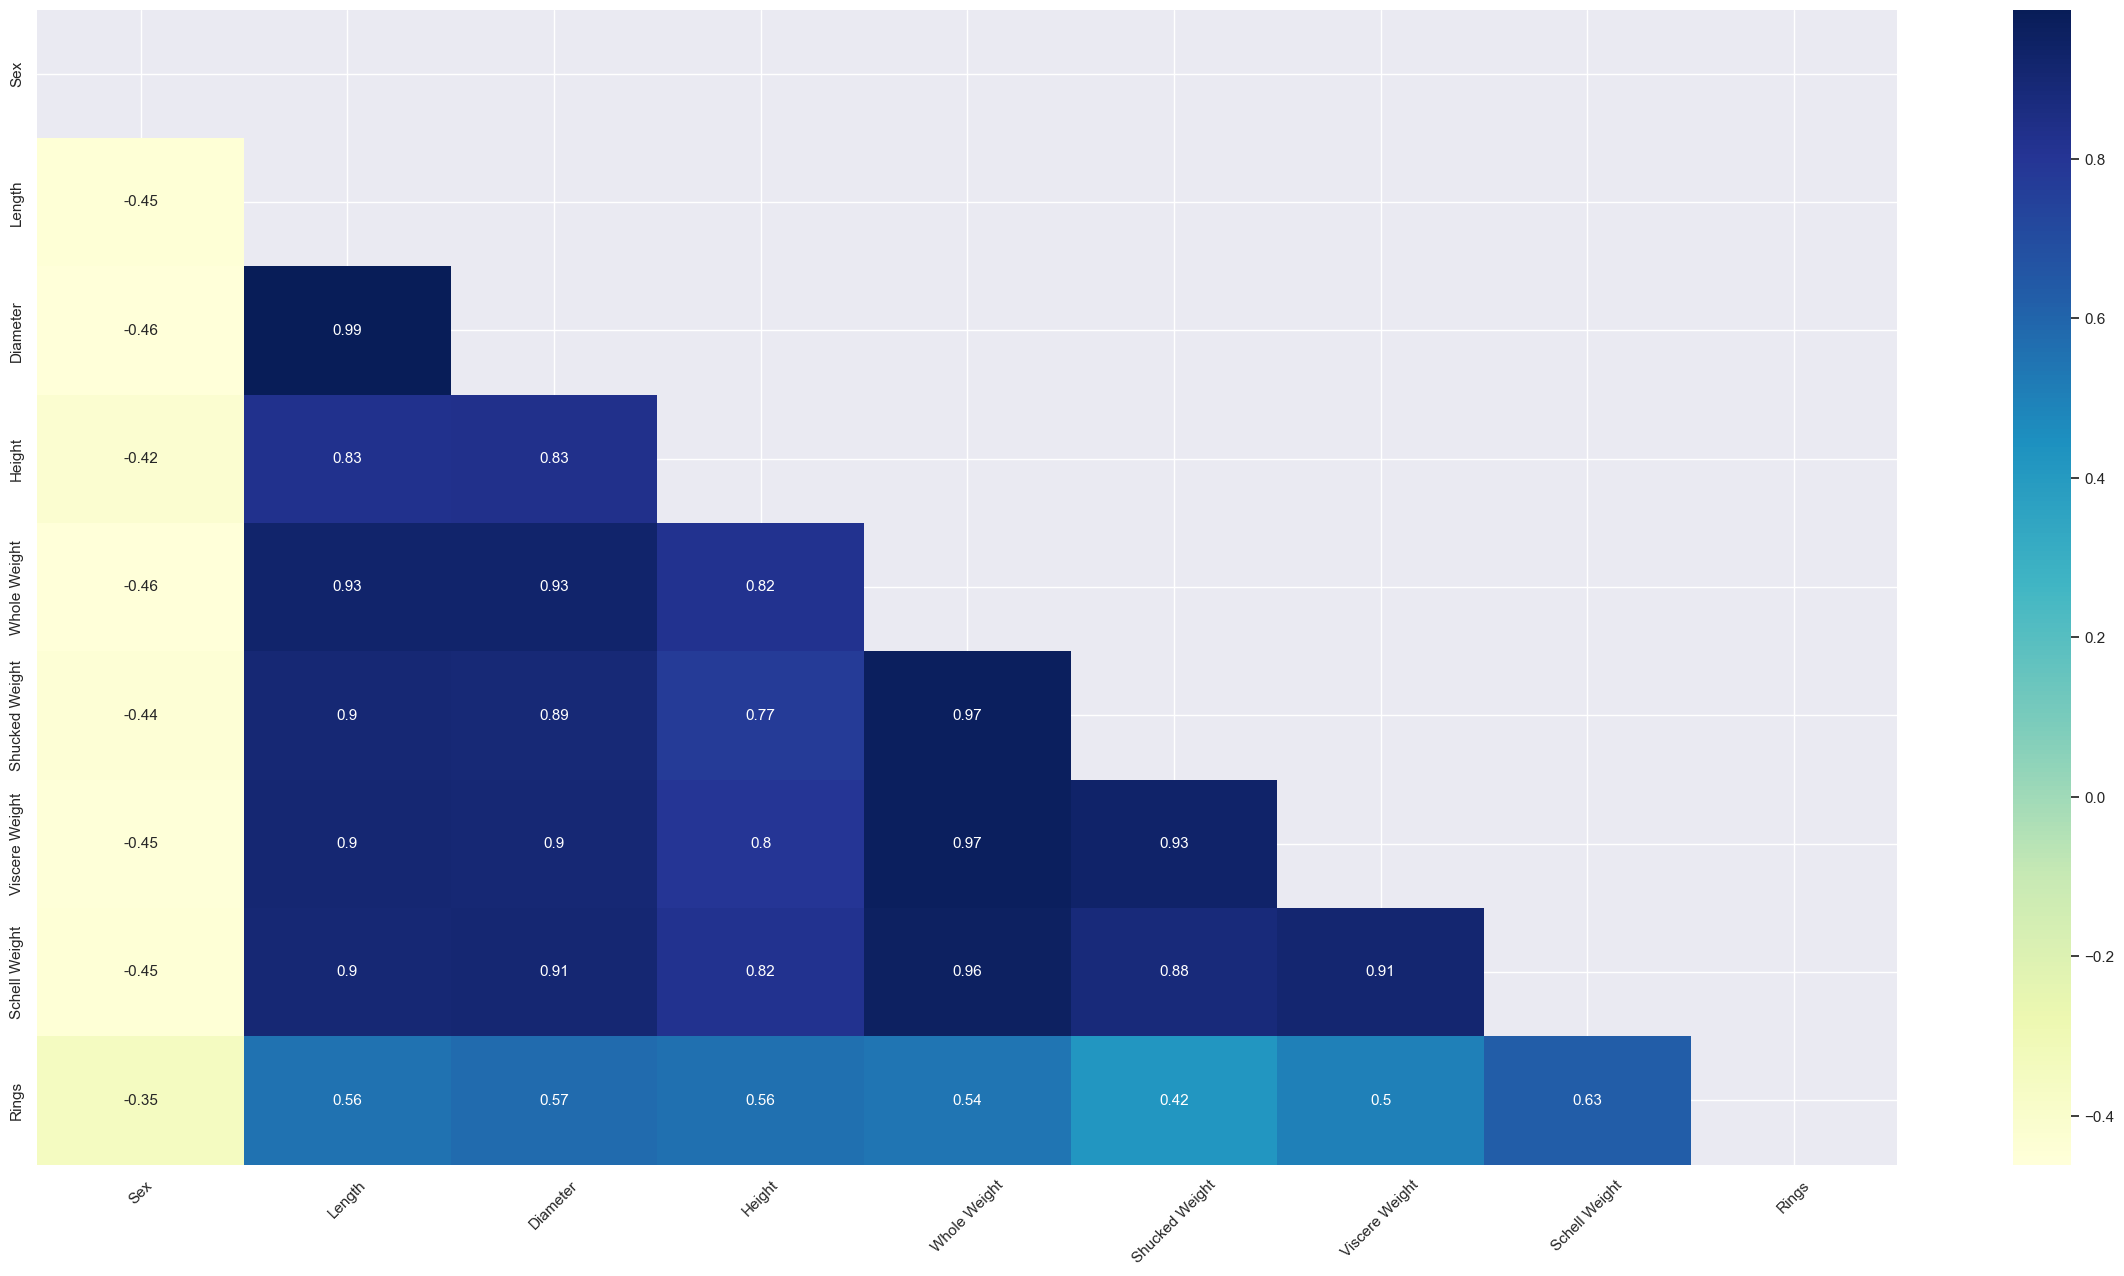

In [ ]:
# Построим матрицу корреляций при помощи  heatmap:

corr_matrix = abalone.corr()

plt.figure(figsize=(30, 15))

mask = np.triu(corr_matrix)

sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True, annot_kws={"fontsize":11}, mask=mask)
plt.xticks(rotation=45)
plt.show()

In [ ]:
# видим, что для пола отсутсвуют корреляция(отрицательная) с признаками, остальные признаки сильно коррелируют друг с другом. Кореляция для длины молюска
# со всеми признаками, кроме колец,  около 90 процентов, с диаметром почти 100%, с кольцами 56%.

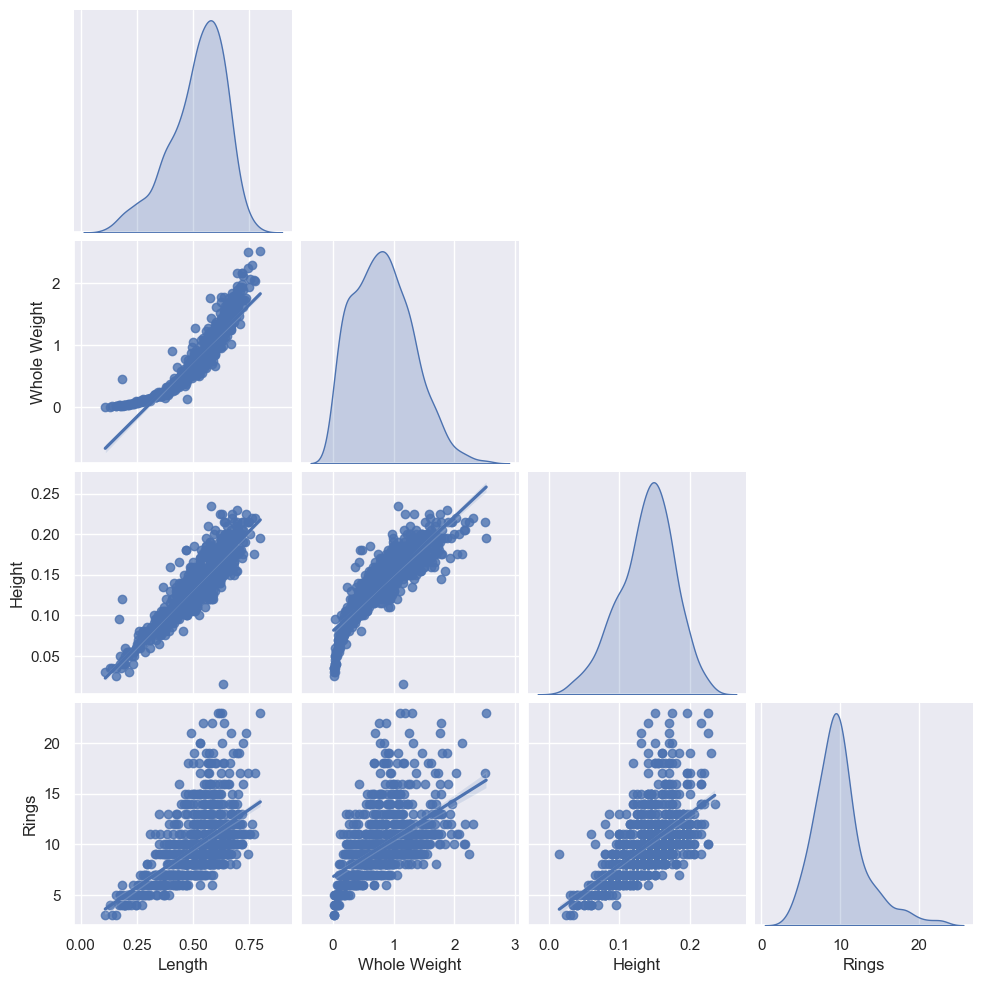

In [ ]:
# построим диаграммы рассеяния для длины, массы, высоты против возраста
sns.pairplot(abalone[['Length', 'Whole Weight', 'Height', 'Rings']].sample(frac=0.2, random_state=42), corner=True, kind='reg', diag_kind='kde')
#sns.pairplot(abalone[['Length', 'Whole Weight', 'Height', 'Rings']], diag_kind='kde')

plt.savefig('pairplots')

plt.show()


In [ ]:
# видим для всех признаков практически нормальное распределение.
# Length vs Whole Weight:
#   видна довольно сильная положительная корреляция между длиной и общим весом абалонов. Это закономерно,
# так как более длинные абалоны должны быть тяжелее.

#Length vs Height:
#Также видим положительную корреляция этих двух признаков, видим, что  с увеличением длины увеличивается и высота,

#Length vs Rings
#Корреляция между длиной и количеством колец слабая,  при увеличении длины количество колец растет не сильно, также видны выбросы, особенно для аполонов
#с большим количеством колец, скорее всего возраст (в виде количества колец) не всегда  зависит от размеров абалона.

#Whole Weight vs Height:
#Сильная  корреляция. Чем больше вес, тем больше высота. Видна линейная зависимость.

#Whole Weight vs Rings:
#Зависимость более слабая, но также положительная. С увеличением веса абалона количество колец (возраст) слегка растет,
#но видим значительный разброс  данных.

#Height vs Rings:
#Между высотой и количеством колец видна  положительная корреляция, но также видим сильный разброс данных, особенно для более взрослых аболонов.


#таким образом мы видим, что зависимости между количеством колец и другими признаками: длиной, весом, высотой не такие сильные,
#как между самими этими признаками. Чем больше абалон по длине, тем больше его вес. Более тяжелые абалоны в основном выше.


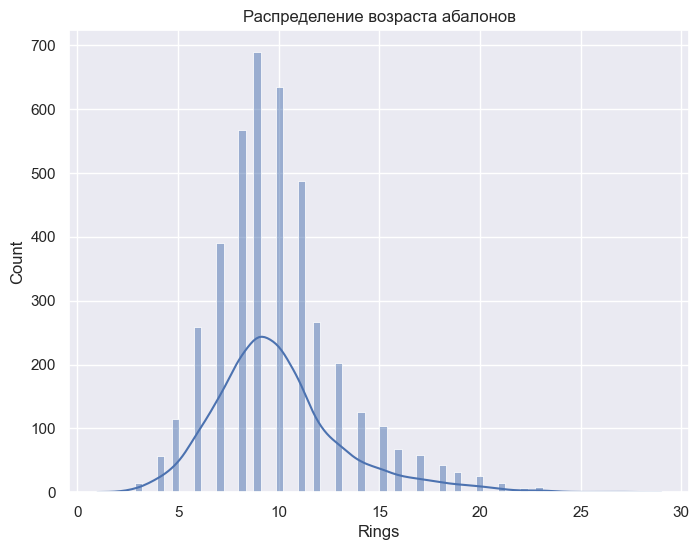

In [ ]:
# построим диаграмму распределения возраста (rings)
plt.figure(figsize=(8, 6))
sns.histplot(abalone['Rings'], kde=True)
plt.title('Распределение возраста абалонов')
plt.show()

In [ ]:
# распределение напоминает нормальное со смещением вправо. большая часть молюсков возраста от 8 до 12 лет.

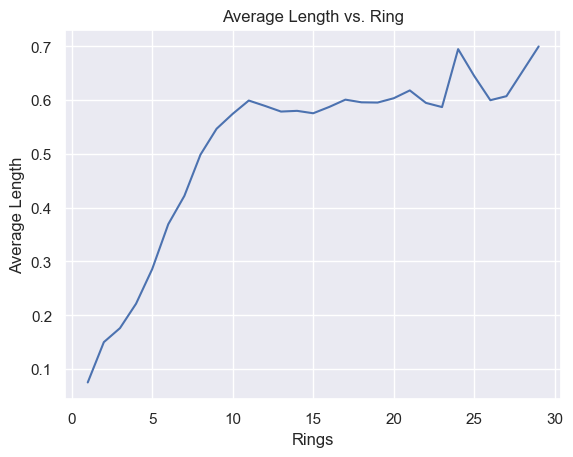

In [ ]:
average_length = abalone.groupby('Rings')['Length'].mean().to_frame()
sns.lineplot(data=average_length, x=average_length.index, y='Length')

plt.title('Average Length vs. Ring')
plt.xlabel('Rings')
plt.ylabel('Average Length')

plt.show()

In [ ]:
# Видим сильную зависимость между осредненной длинной и количеством колец, до 11 летнего вовзраста, далее
# видим, что длина практически имеет постоянное значение, за исключением некоторых подъемов и спадов, которые могут быть связаны
# с неточными данными.

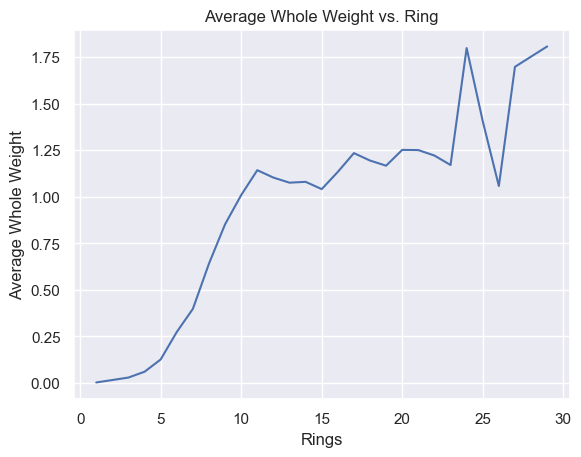

In [ ]:
average_Whole_weight = abalone.groupby('Rings')['Whole Weight'].mean().to_frame()
sns.lineplot(data=average_Whole_weight, x=average_Whole_weight.index, y='Whole Weight')

plt.title('Average Whole Weight vs. Ring')
plt.xlabel('Rings')
plt.ylabel('Average Whole Weight')

plt.show()

In [ ]:
# здесь видим похожую зависимость, также до 11 лет сильный рост веса с увеличением колец.

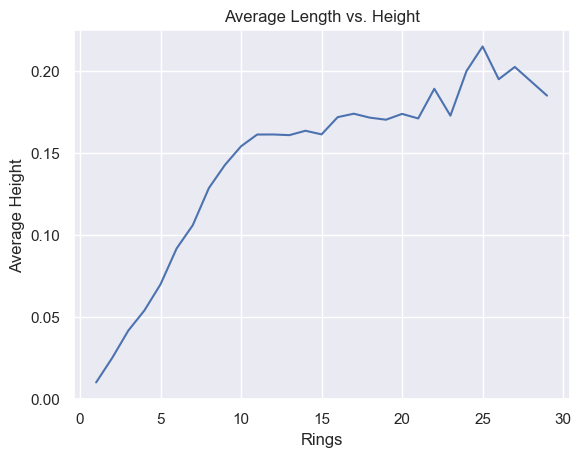

In [ ]:
average_Height = abalone.groupby('Rings')['Height'].mean().to_frame()
sns.lineplot(data=average_Height, x=average_Height.index, y='Height')

plt.title('Average Length vs. Height')
plt.xlabel('Rings')
plt.ylabel('Average Height')

plt.show()

In [ ]:
# таким образом, мы увидели закономерность изменения физических парамеров с возрастом: до 11 лет линейный рост, после 11 лет слабое
#  изменение этих парамаетров с возратсом

In [ ]:
#создадим новые признаки

In [ ]:
abalone['Weight_Length_Ratio'] = abalone['Whole Weight'] / abalone['Length']


<Axes: xlabel='Weight_Length_Ratio', ylabel='Count'>

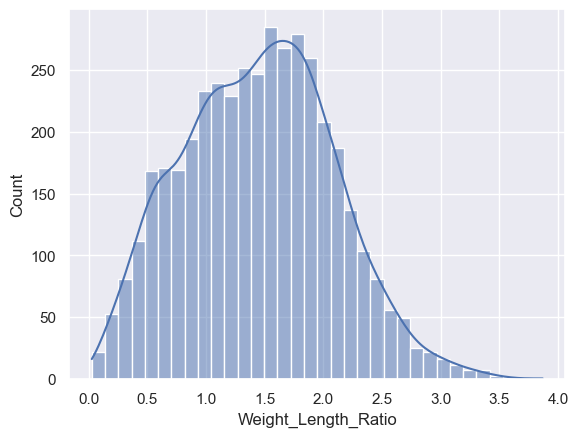

In [ ]:
sns.histplot(abalone['Weight_Length_Ratio'], kde=True)

In [ ]:
#распределение больше теперь напоминает нормальное

Text(0.5, 1.0, 'Соотношение массы к длине в зависимости от длины и возраста абалона')

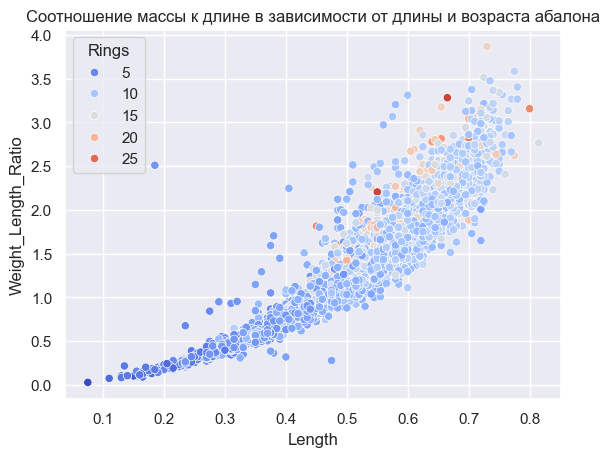

In [ ]:
sns.scatterplot(x='Length', y='Weight_Length_Ratio', hue='Rings', data=abalone, palette='coolwarm')
plt.title('Соотношение массы к длине в зависимости от длины и возраста абалона')


In [ ]:
# видим хорошую кореляцию, снова подтверждается аш вывод, что после приблизительно 11 лет, возраст не сильно влияет на длину и вес.

Text(0.5, 1.0, 'Соотношение массы к длине по возрастным категориям')

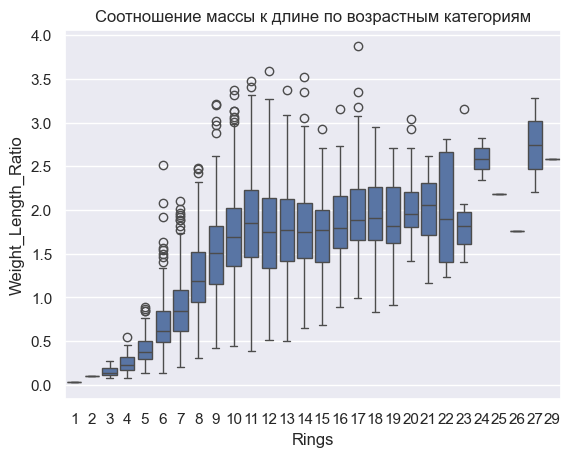

In [ ]:
sns.boxplot(x='Rings', y='Weight_Length_Ratio', data=abalone)
plt.title('Соотношение массы к длине по возрастным категориям')


In [ ]:
# видим значительное колличество выбросов на верхней границе наших ящиков с усами, т.е. выделяются образцы достаточно молодые, но с крупными параметрами

In [ ]:
#посмотрим какие у нас абалоны, округлые или имеют вытянутую форму, для этого создадим новый признак отношение длины к диаметру;

In [ ]:
abalone['Length Diameter Ratio'] = abalone['Length'] / abalone['Diameter']

Text(0.5, 0, 'Length / Diameter Ratio')

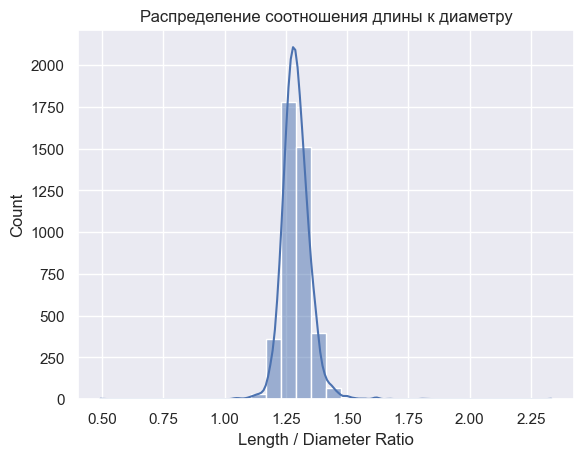

In [ ]:
sns.histplot(abalone['Length Diameter Ratio'], bins=30, kde=True)
plt.title('Распределение соотношения длины к диаметру')
plt.xlabel('Length / Diameter Ratio')

In [ ]:
#види, что они имеют слегка вытянутую форму, но близкую к округлой

In [ ]:
# допустим, что абалоны имеют форму цилиндра, посчитаем площадь поверхности абалонов, как новый признак

In [ ]:
abalone['Surface_Area'] = 2 * np.pi * (abalone['Diameter'] / 2) *(abalone['Diameter']/2 +  abalone['Length'] )


<Axes: xlabel='Surface_Area', ylabel='Rings'>

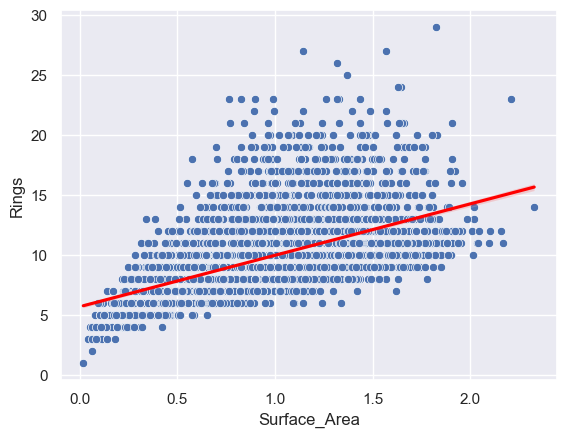

In [ ]:
sns.scatterplot(x='Surface_Area', y='Rings', data=abalone)
sns.regplot(x='Surface_Area', y='Rings', data=abalone, scatter=False, color='red')


In [ ]:

# видим сильный разброс значений :(

In [ ]:
# Попробуем сгруппировать по возрасту: молодые, взрослые, старые

In [ ]:
abalone['Age_Group'] = pd.cut(abalone['Rings'], bins=[0, 8, 12, 30], labels=['Young', 'Adult', 'Old'])


Text(0.5, 1.0, 'Распределение абалонов по возрастным группам')

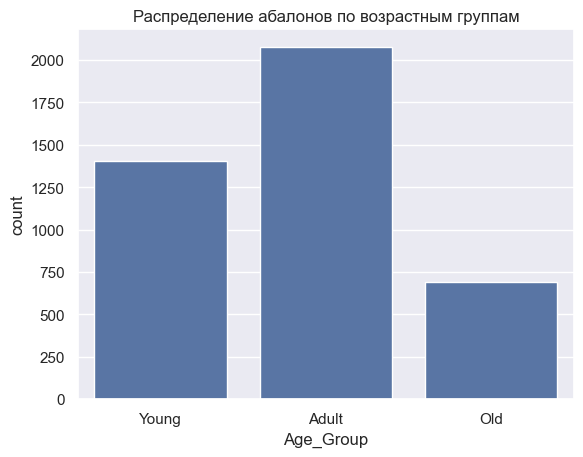

In [ ]:
sns.countplot(x='Age_Group', data=abalone)
plt.title('Распределение абалонов по возрастным группам')


In [ ]:
# видим, что больше всего у нас взрослых аполонов, меньше всего старых

Text(0.5, 1.0, 'Распределение массы по возрастным группам')

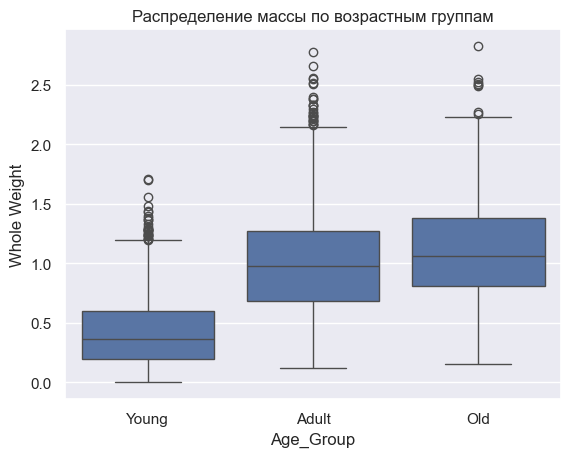

In [ ]:
sns.boxplot(x='Age_Group', y='Whole Weight', data=abalone)
plt.title('Распределение массы по возрастным группам')


In [ ]:
# видим, что для молодых медианный вес равен 0.4, 50% значений находится в диапазоне от 0.3 до 0.6.
# ДЛя взрослых и старых медианное значение практически одинаково, около 1, 50% значений имеют также почти одинаковый диапазон значений

In [ ]:
# Посмотрим на распределение массы в каждой возрастной группе:

Text(0.5, 1.05, 'Распределение массы в каждой возрастной группе')

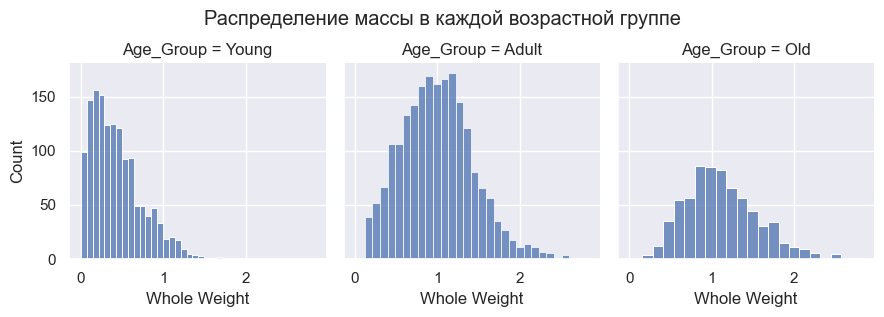

In [ ]:
g = sns.FacetGrid(abalone, col="Age_Group", margin_titles=True)
g.map(sns.histplot, "Whole Weight")
plt.suptitle('Распределение массы в каждой возрастной группе', y=1.05)


In [ ]:
#видим, что для молодых распределение массы от 0.1 до 1, для взрослых и старых видим что приблизительно  одинаковое
#количество аболонов с массой от 0.1 до 1 и от 1 до 2

In [ ]:
применим модель KNN Regressor

In [ ]:
# Создадим матрицы призанков и целевой вектор y:
X = abalone[['Length', 'Diameter', 'Height', 'Surface_Area', 'Whole Weight', 'Shucked Weight', 'Viscere Weight', 'Schell Weight', 'Weight_Length_Ratio']]
y = abalone.Rings

In [ ]:
# разбьем выбору на обучение и тест:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42, test_size=0.2)
X_train.shape, X_test.shape

((3341, 9), (836, 9))

In [ ]:
knn= KNeighborsRegressor()

In [ ]:
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [ ]:
pred_train=knn.predict(X_train)
pred_test=knn.predict(X_test)

print('Train:', r2_score(y_train, pred_train))
print('Test:', r2_score(y_test, pred_test))

Train: 0.6576744519185225
Test: 0.4866448770873162


In [ ]:
# Для того, чтобы улучшить модель применим нормализацию данных

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
# Масштабируем наши признаки, применим нормализацию:

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms=MinMaxScaler()
mms.fit(X_train)

MinMaxScaler()

In [ ]:
#Посмотрим какие у нас сейчас минимальные значения в признаках:

In [ ]:
mms.data_min_

array([0.075     , 0.055     , 0.        , 0.01771073, 0.002     ,
       0.001     , 0.0005    , 0.0015    , 0.02666667])

In [ ]:
X_train.min()

Length                 0.075000
Diameter               0.055000
Height                 0.000000
Surface_Area           0.017711
Whole Weight           0.002000
Shucked Weight         0.001000
Viscere Weight         0.000500
Schell Weight          0.001500
Weight_Length_Ratio    0.026667
dtype: float64

In [ ]:
#Посмотрим какие у нас сейчас максимальные значения в признаках:

In [ ]:
mms.data_max_

array([0.815     , 0.65      , 1.13      , 2.32792016, 2.8255    ,
       1.488     , 0.76      , 1.005     , 3.87054795])

In [ ]:
X_train.max()

Length                 0.815000
Diameter               0.650000
Height                 1.130000
Surface_Area           2.327920
Whole Weight           2.825500
Shucked Weight         1.488000
Viscere Weight         0.760000
Schell Weight          1.005000
Weight_Length_Ratio    3.870548
dtype: float64

In [ ]:
# нормализуем нашу обучающую выборку:

In [ ]:
mms.transform(X_train)

array([[0.64189189, 0.65546218, 0.11061947, ..., 0.17906517, 0.2077728 ,
        0.31092311],
       [0.54054054, 0.50420168, 0.08849558, ..., 0.11915734, 0.13801694,
        0.26882551],
       [0.31081081, 0.28571429, 0.0619469 , ..., 0.04344964, 0.04334828,
        0.11972757],
       ...,
       [0.58783784, 0.57142857, 0.11061947, ..., 0.17511521, 0.18584953,
        0.28917871],
       [0.67567568, 0.68907563, 0.10619469, ..., 0.28703094, 0.2326856 ,
        0.46970942],
       [0.7027027 , 0.70588235, 0.14159292, ..., 0.30348914, 0.26856004,
        0.49172696]])

In [ ]:
X_train_norm=pd.DataFrame(mms.transform(X_train), columns=X_train.columns)
X_train_norm

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
0,0.641892,0.655462,0.110619,0.459807,0.237294,0.193006,0.179065,0.207773,0.310923
1,0.540541,0.504202,0.088496,0.307331,0.177616,0.169805,0.119157,0.138017,0.268826
2,0.310811,0.285714,0.061947,0.120077,0.051886,0.038668,0.043450,0.043348,0.119728
3,0.270270,0.243697,0.057522,0.094324,0.040553,0.037323,0.016458,0.033383,0.103273
4,0.567568,0.546218,0.119469,0.346309,0.222242,0.176194,0.186965,0.212755,0.323905
...,...,...,...,...,...,...,...,...,...
3336,0.560811,0.579832,0.101770,0.367659,0.200815,0.171486,0.173799,0.143000,0.295159
3337,0.804054,0.831933,0.168142,0.699128,0.491766,0.364156,0.398947,0.397110,0.532979
3338,0.587838,0.571429,0.110619,0.372367,0.204888,0.163416,0.175115,0.185850,0.289179
3339,0.675676,0.689076,0.106195,0.502949,0.372410,0.346335,0.287031,0.232686,0.469709


In [ ]:
X_train_norm.describe()

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,0.608060,0.594149,0.123708,0.419843,0.293550,0.241803,0.237435,0.237351,0.369812
std,0.160997,0.165860,0.037623,0.179564,0.174104,0.149978,0.144100,0.139453,0.165943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.506757,0.495798,0.101770,0.289806,0.156189,0.124748,0.121791,0.128052,0.244640
50%,0.635135,0.621849,0.123894,0.427238,0.283336,0.225958,0.224490,0.231689,0.373287
75%,0.729730,0.714286,0.146018,0.553690,0.406942,0.337929,0.333114,0.325859,0.483019
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# сделаем также на тестовой выборке нормализацию

In [ ]:
X_test_norm=pd.DataFrame(mms.transform(X_test), columns=X_train.columns)
X_test_norm.describe()

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
count,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000,836.000000
mean,0.601497,0.588798,0.122497,0.414524,0.289841,0.237794,0.235866,0.233115,0.366967
std,0.167344,0.170487,0.034484,0.180725,0.172052,0.146445,0.145299,0.135767,0.167292
min,0.047297,0.058824,0.013274,0.011304,0.002125,0.001009,0.001975,0.001495,0.011983
25%,0.500000,0.495798,0.101770,0.284690,0.153621,0.124412,0.122449,0.129547,0.245764
50%,0.628378,0.617647,0.123894,0.423550,0.279972,0.222764,0.223173,0.231440,0.374622
75%,0.722973,0.714286,0.146018,0.544408,0.410351,0.334314,0.329164,0.327354,0.488250
max,0.979730,0.966387,0.207965,0.947577,0.893926,0.777068,0.776169,0.845541,0.865712


In [ ]:
knn= KNeighborsRegressor()

In [ ]:
knn.fit(X_train_norm, y_train)

KNeighborsRegressor()

In [ ]:
pred_train=knn.predict(X_train_norm)
pred_test=knn.predict(X_test_norm)

print('Train:', r2_score(y_train, pred_train))
print('Test:', r2_score(y_test, pred_test))

Train: 0.6671183328152395
Test: 0.513637513323295


In [ ]:
# совсем немного стало лучше, попробуем другой метод масштабирования, стандартизацию данных

In [ ]:
scaler=StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [ ]:
scaler.mean_

array([0.52496408, 0.40851841, 0.13979048, 0.98763523, 0.83083837,
       0.36056061, 0.18083224, 0.23968153, 1.44818129])

In [ ]:
X_train.mean()

Length                 0.524964
Diameter               0.408518
Height                 0.139790
Surface_Area           0.987635
Whole Weight           0.830838
Shucked Weight         0.360561
Viscere Weight         0.180832
Schell Weight          0.239682
Weight_Length_Ratio    1.448181
dtype: float64

In [ ]:
# приводим нашу выборку к стандартному виду:

In [ ]:
X_train_std=pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_train_std

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
0,0.210175,0.369725,-0.347950,0.222598,-0.323164,-0.325407,-0.405130,-0.212132,-0.354929
1,-0.419444,-0.542386,-0.936082,-0.626676,-0.665985,-0.480126,-0.820932,-0.712419,-0.608653
2,-1.846581,-1.859881,-1.641840,-1.669663,-1.388250,-1.354628,-1.346395,-1.391379,-1.507276
3,-2.098428,-2.113245,-1.759467,-1.813103,-1.453355,-1.363597,-1.533734,-1.462848,-1.606447
4,-0.251546,-0.289022,-0.112697,-0.409576,-0.409632,-0.437522,-0.350299,-0.176398,-0.276689
...,...,...,...,...,...,...,...,...,...
3336,-0.293521,-0.086330,-0.583203,-0.290658,-0.532723,-0.468915,-0.441684,-0.676684,-0.449937
3337,1.217565,1.433855,1.181193,1.555589,1.138658,0.815929,1.120999,1.145788,0.983413
3338,-0.125622,-0.137003,-0.347950,-0.264432,-0.509325,-0.522730,-0.432545,-0.369365,-0.485983
3339,0.420048,0.572417,-0.465577,0.462895,0.453016,0.697087,0.344227,-0.033459,0.602086


In [ ]:
X_train_std.describe()

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
count,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3.341000e+03,3341.000000
mean,5.635852e-16,2.041667e-16,-3.105036e-16,1.063368e-16,-1.063368e-17,2.530817e-16,1.680122e-16,1.828994e-16,0.000000
std,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150e+00,1.000150
min,-3.777412e+00,-3.582758e+00,-3.288610e+00,-2.338478e+00,-1.686311e+00,-1.612494e+00,-1.647965e+00,-1.702271e+00,-2.228881
25%,-6.293175e-01,-5.930591e-01,-5.832029e-01,-7.242900e-01,-7.890755e-01,-7.805961e-01,-8.026546e-01,-7.838882e-01,-0.754422
50%,1.681999e-01,1.670339e-01,4.928971e-03,4.119266e-02,-5.867303e-02,-1.056604e-01,-8.985185e-02,-4.060562e-02,0.020944
75%,7.558443e-01,7.244354e-01,5.930609e-01,7.455124e-01,6.513840e-01,6.410292e-01,6.640741e-01,6.347810e-01,0.682302
max,2.434828e+00,2.447313e+00,2.329495e+01,3.231414e+00,4.058233e+00,5.056140e+00,5.292723e+00,5.469691e+00,3.798179


In [ ]:
pd.set_option('display.float_format', lambda x: '%0.4f' % x)

In [ ]:
X_train_std.describe()

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
count,3341.0000,3341.0000,3341.0000,3341.0000,3341.0000,3341.0000,3341.0000,3341.0000,3341.0000
mean,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
std,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001,1.0001
min,-3.7774,-3.5828,-3.2886,-2.3385,-1.6863,-1.6125,-1.6480,-1.7023,-2.2289
25%,-0.6293,-0.5931,-0.5832,-0.7243,-0.7891,-0.7806,-0.8027,-0.7839,-0.7544
50%,0.1682,0.1670,0.0049,0.0412,-0.0587,-0.1057,-0.0899,-0.0406,0.0209
75%,0.7558,0.7244,0.5931,0.7455,0.6514,0.6410,0.6641,0.6348,0.6823
max,2.4348,2.4473,23.2950,3.2314,4.0582,5.0561,5.2927,5.4697,3.7982


In [ ]:
X_test_std=pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)
X_test_std.describe()

,Length,Diameter,Height,Surface_Area,Whole Weight,Shucked Weight,Viscere Weight,Schell Weight,Weight_Length_Ratio
count,836.0000,836.0000,836.0000,836.0000,836.0000,836.0000,836.0000,836.0000,836.0000
mean,-0.0408,-0.0323,-0.0322,-0.0296,-0.0213,-0.0267,-0.0109,-0.0304,-0.0171
std,1.0396,1.0280,0.9167,1.0066,0.9884,0.9766,1.0085,0.9737,1.0083
min,-3.4836,-3.2280,-2.9357,-2.2755,-1.6741,-1.6058,-1.6343,-1.6916,-2.1567
25%,-0.6713,-0.5931,-0.5832,-0.7528,-0.8038,-0.7828,-0.7981,-0.7732,-0.7476
50%,0.1262,0.1417,0.0049,0.0206,-0.0780,-0.1270,-0.0990,-0.0424,0.0290
75%,0.7139,0.7244,0.5931,0.6938,0.6710,0.6169,0.6367,0.6455,0.7138
max,2.3089,2.2446,2.2398,2.9394,3.4489,3.5695,3.7392,4.3619,2.9888


In [ ]:
knn= KNeighborsRegressor()

In [ ]:
knn.fit(X_train_std, y_train)

KNeighborsRegressor()

In [ ]:
pred_train=knn.predict(X_train_std)
pred_test=knn.predict(X_test_std)

print('Train:', r2_score(y_train, pred_train))
print('Test:', r2_score(y_test, pred_test))

Train: 0.6636700123990567
Test: 0.4640545113099971


In [ ]:
# не помогло:(

In [ ]:
# Применим модель KNN классификации

In [ ]:

# Выберем признаки для обучения и целевую переменную
X = abalone[['Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscere Weight', 'Schell Weight']]
y = abalone['Age_Group']

# Разделяем данные на тренировочную (60%), временную тестовую (40%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)

#  делим временную тестовую выборку на валидационную (20%) и тестовую (20%)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Нормализуем данные для всех частей
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Создаем модель KNN с взвешенными весами на основе расстояния
knn = KNeighborsClassifier(n_neighbors=5, weights='distance')

# Обучаем модель на тренировочных данных
knn.fit(X_train_scaled, y_train)

# Делаем прогнозы на валидационных данных
y_val_pred = knn.predict(X_val_scaled)

# Оцениваем модель на валидационной выборке
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred)}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# делаем прогнозы на тестовой выборке
y_test_pred = knn.predict(X_test_scaled)

# Оцениваем модель на тестовой выборке
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred)}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))



Validation Accuracy: 0.6682634730538922

Validation Classification Report:
              precision    recall  f1-score   support

       Adult       0.65      0.72      0.68       404
         Old       0.44      0.31      0.36       125
       Young       0.76      0.75      0.75       306

    accuracy                           0.67       835
   macro avg       0.62      0.59      0.60       835
weighted avg       0.66      0.67      0.66       835

Test Accuracy: 0.6734449760765551

Test Classification Report:
              precision    recall  f1-score   support

       Adult       0.69      0.71      0.70       432
         Old       0.50      0.42      0.45       131
       Young       0.71      0.73      0.72       273

    accuracy                           0.67       836
   macro avg       0.63      0.62      0.63       836
weighted avg       0.67      0.67      0.67       836



In [ ]:
# Точность (Accuracy) на валидационной выборке составляет  67%. Это означает, что модель правильно классифицировала около 67% абалонов на основе их
#признаков. Это средний результат, поэтому модель требует улучшений
#Validation Classification Report:
#Precision, Recall и F1-Score для каждой возрастной группы:
#Adult (взрослые абалоны):
#Precision:  65% всех абалонов, которые модель определила как взрослые, действительно являются взрослыми.
#Recall:  72% всех настоящих взрослых абалонов были правильно определены моделью.
#F1-Score: 0.68 — сбалансированная метрика между precision и recall, средний результат
#Old (старые абалоны):
#Precision: только 44% предсказанных как старые действительно являются старыми.
#Recall: модель обнаружила лишь 31% настоящих старых абалонов.
#F1-Score: 0.36 — низкая, модель хуже классифицирует эту группу
#Young (молодые абалоны):
#Precision: 76% предсказаний молодых оказались правильными.
#Recall: 75% настоящих молодых абалонов были правильно определены.
#F1-Score: 0.75 — хороший результат для этой категории.
# Test Accuracy: 0.673
#На валидационной выборке модель показала аналогичную точность 67%, т.о. модель не переобучена на тренировочных данных.
# Test Classification Report:
#Результаты на тестовой выборке очень похожи на валидационные.
#Попробуем улучшить модель, однако проблемы модели могут возникать из-за физических зависимостей характеристик, которые мы видили при анализе данных:
#мы виделе, что чем моложе экземпляр, тем лучшие зависимости были обнаружены.



In [ ]:
#Попробуем изменить количество соседей (n_neighbors), подобрать другие расстояния
#Введем дополнительные признаки, которые мы получили при анализе данных


In [ ]:
# Определим параметры для поиска
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Количество соседей
    'metric': ['euclidean', 'manhattan'],  # Метрика расстояний
    'weights': ['uniform', 'distance']  # Взвешивание соседей
}

# Инициализируем модель KNN
knn = KNeighborsClassifier()

# Используем GridSearchCV для поиска лучших гиперпараметров
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Обучим модель на тренировочных данных
grid_search.fit(X_train, y_train)

# Выведем лучшие параметры
print("Лучшие параметры: ", grid_search.best_params_)

# Оценим модель на валидационной выборке
y_val_pred = grid_search.predict(X_val)

# Выведем отчет классификации
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Оценим модель на тестовой выборке
y_test_pred = grid_search.predict(X_test)
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))


Лучшие параметры:  {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Validation Classification Report:
              precision    recall  f1-score   support

       Adult       0.68      0.75      0.72       404
         Old       0.59      0.39      0.47       125
       Young       0.75      0.75      0.75       306

    accuracy                           0.70       835
   macro avg       0.67      0.63      0.65       835
weighted avg       0.69      0.70      0.69       835

Test Classification Report:
              precision    recall  f1-score   support

       Adult       0.71      0.78      0.74       432
         Old       0.60      0.41      0.49       131
       Young       0.75      0.74      0.74       273

    accuracy                           0.71       836
   macro avg       0.69      0.64      0.66       836
weighted avg       0.70      0.71      0.70       836



In [ ]:
#после настройки  гиперпараметров показатели модели заметно улучшились:

#Лучшие параметры:
#Метрика расстояния: Манхэттенская, Количество соседей: 9, Взвешивание по расстоянию: использование весов по расстоянию.
#Валидация:
#Точность  модель предсказывает правильно в 70% случаев, что является улучшением по сравнению с предыдущей точностью. Классификация молодых и взрослых
#очень хорошая, только классификация старых остается низкой,  что  говорит о том, что в данных меньше примеров старых абалонов.
#Тест:
#Точность: 0.71 — модель хорошо классифицирует и  на тестовых данных.


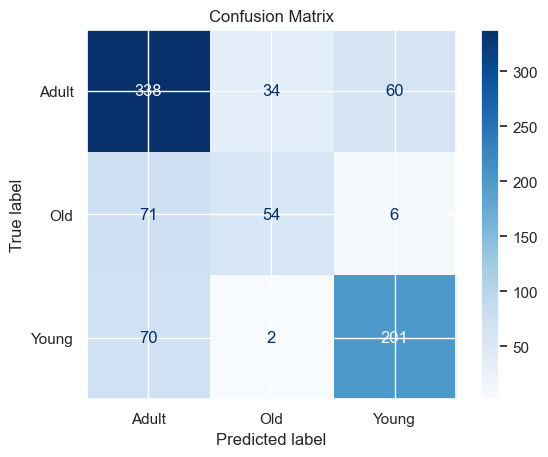

In [ ]:
#  Матрица ошибок

# Создаем матрицу ошибок
cm = confusion_matrix(y_test, y_test_pred, labels=np.unique(y_test))

# Визуализация матрицы ошибок
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [ ]:
# Видим, что лучше всего модель предсказывает взрослых и молодых аболонов.